In [1]:
import pandas as pd
import numpy as np

In [2]:
import scipy.stats as stat
import matplotlib.pyplot as plt

In [3]:
import scipy.optimize as optimize
import scipy.special as sp

In [4]:
import random as rand
import math

In [5]:
from scipy.interpolate import interp1d
import statsmodels.api as sm

In [6]:
import skmisc.loess as loess
import copy 
import copy as deepcopy

In [7]:
df = pd.read_csv('../Data_All_180906/CSV/Forecasting AI Progress v1.0.csv')

In [8]:
df = df.iloc[:,9:]

In [9]:
df.columns = ['name','surname','employer','job','Q1',
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13']

In [10]:
dfx = pd.read_csv('../data_b.csv',keep_default_na=False)
df4 = dfx.iloc[:,7:]
df4.columns = ['role','demo','name','surname','employer','job','Q1',\
             'Q2','Q3','Q4','Q5a','Q5b','Q5c','Cq5','Q6a','Q6b',
             'Q6c','Cq6','Q7a','Q7b','Q7c','Q8a','Q8b','Q8c',
             'Cq7-8','Q9a','Q9b','Q9c','Q10a','Q10b','Q10c',
             'Cq9-10','Q11','Q12','Q13','Cq11-13','expert']
experts = df4.expert
demo = df4.demo
roles = df4.role
demo = np.asarray(demo)
roles = np.asarray(roles)
print(demo.shape)
print(roles.shape)
role = np.zeros(demo.shape[0]+1)
region = np.zeros(demo.shape[0]+1)
gender = np.zeros(demo.shape[0]+1)
experts = np.asarray(experts)
expert = np.zeros(demo.shape[0]+1)
for i in range(0,demo.shape[0]-1):
    try:
        vals = demo[i+1].split(',')
        #print (vals)
        if vals[0] == 'EU':
            region[i+1] = 0
        elif vals[0] == 'A':
            region[i+1] = 1
        elif vals[0] == 'NA':
            region[i+1] = 2
        elif vals[0] == 'O':
            region[i+1] = 3
        elif vals[0] == 'X':
            region[i+1] = -1
        elif vals[0] == 'SA':
            region[i+1] = 3
        elif vals[0] == 'AR':
            region[i+1] = 3
        else:
            region[i+1] = -1
            #print(vals[0])
        try:
            if vals[1] == 'f':
                gender[i+1] = 0
            else:
                gender[i+1] = 1
        except:
            gender[i+1] = 1
    except:
        region[i+1] = -1
        gender[i+1] = -1
    if roles[i+1] == 'phd': #grad student
        role[i+1] = 0
    elif roles[i+1] == 'prof': #academic
        role[i+1] = 1
    elif roles[i+1] == 'r': #industry research
        role[i+1] = 2
    elif roles[i+1] == 'eng': #industry engineer
        role[i+1] = 3
    elif roles[i+1] == 'exec': #industry executive
        role[i+1] = 4
    elif roles[i+1] == 'f': #founder
        role[i+1] = 5
    else: role[i+1] = -1
    if experts[i+1] == 'x' or experts[i+1] == 'na':
        expert[i+1] = -1
    else:
        expert[i+1] = 1
expert_df = pd.DataFrame(expert)
df['expert'] = expert_df
region_df = pd.DataFrame(region)
gender_df = pd.DataFrame(gender)
role_df = pd.DataFrame(role)
df['region'] = region_df
df['gender'] = gender_df
df['role'] = role_df

(230,)
(230,)


In [11]:
df = df.dropna(subset=['name','surname','employer','job'])

In [12]:
df.shape

(201, 38)

### Naive calibration A 

In [13]:
df['weight'] = 1.
df2 = df.iloc[1:]
df2.Q1 = pd.to_numeric(df2.Q1)
mask = df2.Q1 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q1 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q2 = pd.to_numeric(df2.Q2)
mask = df2.Q2 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q2 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q3 = pd.to_numeric(df2.Q3)
mask = df2.Q3 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q3 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25
df2.Q4 = pd.to_numeric(df2.Q4)
mask = df2.Q4 == 0
df2.loc[mask, 'weight'] = df2.weight - 0.25
mask = df2.Q4 == 100
df2.loc[mask, 'weight'] = df2.weight - 0.25

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Naive calibration B 

In [14]:
df3 = df.iloc[1:]
df3.Q1 = pd.to_numeric(df3.Q1)
mask = df3.Q1 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q1 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q2 = pd.to_numeric(df3.Q2)
mask = df3.Q2 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q2 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q3 = pd.to_numeric(df3.Q3)
mask = df3.Q3 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q3 == 100
df3.loc[mask, 'weight'] = 0.
df3.Q4 = pd.to_numeric(df3.Q4)
mask = df3.Q4 == 0
df3.loc[mask, 'weight'] = 0.
mask = df3.Q4 == 100
df3.loc[mask, 'weight'] = 0.

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
q1 = df.Q1
q2 = df.Q2
q3 = df.Q3
q4 = df.Q4
q5 = df[['Q5a','Q5b','Q5c']]
q6 = df[['Q6a','Q6b','Q6c']]
q7 = df[['Q7a','Q7b','Q7c']]
q8 = df[['Q8a','Q8b','Q8c']]
q9 = df[['Q9a','Q9b','Q9c']]
q10 = df[['Q10a','Q10b','Q10c']]
q11 = df.Q11
q12 = df.Q12
q13 = df.Q13

In [16]:
q1 = q1.dropna()
q2 = q2.dropna()
q3 = q3.dropna()
q4 = q4.dropna()
q5 = q5.dropna()
q6 = q6.dropna()
q7 = q7.dropna()
q8 = q8.dropna()
q9 = q9.dropna()
q10 = q10.dropna()
q11 = q11.dropna()
q12 = q12.dropna()
q13 = q13.dropna()

### Filtering Q6 

In [17]:
q6 = q6.iloc[1:]
q6 = q6.astype(float)
q6.head()

,Q6a,Q6b,Q6c
1,2018.0,2020.0,2022.0
3,2025.0,2050.0,2075.0
4,3.0,6.0,8.0
5,0.0,3.0,10.0
6,10.0,20.0,50.0


In [18]:
mask = q6.Q6a > 2000
mask2 = q6.Q6a < 3000
mask = mask*mask2
q6.loc[mask, 'Q6a'] = q6.Q6a - 2018
q6.loc[mask, 'Q6b'] = q6.Q6b - 2018
q6.loc[mask, 'Q6c'] = q6.Q6c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [19]:
q6b = df2[['Q6a','Q6b','Q6c','weight']]
q6b = q6b.dropna()
q6b = q6b.astype(float)
mask = q6b.Q6a > 2000
mask2 = q6b.Q6a < 3000
mask = mask*mask2
q6b.loc[mask, 'Q6a'] = q6b.Q6a - 2018
q6b.loc[mask, 'Q6b'] = q6b.Q6b - 2018
q6b.loc[mask, 'Q6c'] = q6b.Q6c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [20]:
q6c = df3[['Q6a','Q6b','Q6c','weight']]
q6c = q6c.dropna()
q6c = q6c.astype(float)
mask = q6c.Q6a > 2000
mask2 = q6c.Q6a < 3000
mask = mask*mask2
q6c.loc[mask, 'Q6a'] = q6c.Q6a - 2018
q6c.loc[mask, 'Q6b'] = q6c.Q6b - 2018
q6c.loc[mask, 'Q6c'] = q6c.Q6c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


In [21]:
q6d = df[['Q6a','Q6b','Q6c','gender','region','role','expert']]
q6d = q6d.iloc[1:]
q6d = q6d.dropna()
q6d = q6d.astype(float)
mask = q6d.Q6a > 2000
mask2 = q6d.Q6a < 3000
mask = mask*mask2
q6d.loc[mask, 'Q6a'] = q6d.Q6a - 2018
q6d.loc[mask, 'Q6b'] = q6d.Q6b - 2018
q6d.loc[mask, 'Q6c'] = q6d.Q6c - 2018

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/computation/expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


### Fitting to Gamma CDF 

In [22]:
#Manually handle extreme responses
extremeResponses = [14,56,100,102,120,134,164,222]

In [23]:
for i in extremeResponses:
    q6.loc[i]['Q6a'] = 1000
    q6.loc[i]['Q6b'] = 10000
    q6.loc[i]['Q6c'] = 100000

In [24]:
q6 = q6[q6.Q6c >= 0.000001]
q6 = q6[q6.Q6c-q6.Q6b >= 0.000001]
q6 = q6[q6.Q6c-q6.Q6a >= 0.000001]
q6 = q6[q6.Q6a <= 5000]
q6 = q6[q6.Q6b <= 5000]
q6 = q6[q6.Q6c <= 5000]
q6.shape[0]

150

In [25]:
for i in extremeResponses:
    q6b.loc[i]['Q6a'] = 1000
    q6b.loc[i]['Q6b'] = 10000
    q6b.loc[i]['Q6c'] = 100000
q6b = q6b[q6b.Q6c >= 0.000001]
q6b = q6b[q6b.Q6c-q6b.Q6b >= 0.000001]
q6b = q6b[q6b.Q6c-q6b.Q6a >= 0.000001]
q6b = q6b[q6b.Q6a <= 5000]
q6b = q6b[q6b.Q6b <= 5000]
q6b = q6b[q6b.Q6c <= 5000]
q6b.shape[0]

150

In [26]:
for i in extremeResponses:
    q6c.loc[i]['Q6a'] = 1000
    q6c.loc[i]['Q6b'] = 10000
    q6c.loc[i]['Q6c'] = 100000
q6c = q6c[q6c.Q6c >= 0.000001]
q6c = q6c[q6c.Q6c-q6c.Q6b >= 0.000001]
q6c = q6c[q6c.Q6c-q6c.Q6a >= 0.000001]
q6c = q6c[q6c.Q6a <= 5000]
q6c = q6c[q6c.Q6b <= 5000]
q6c = q6c[q6c.Q6c <= 5000]
q6c.shape[0]

150

In [27]:
for i in extremeResponses:
    q6d.loc[i]['Q6a'] = 1000
    q6d.loc[i]['Q6b'] = 10000
    q6d.loc[i]['Q6c'] = 100000
q6d = q6d[q6d.Q6c >= 0.000001]
q6d = q6d[q6d.Q6c-q6d.Q6b >= 0.000001]
q6d = q6d[q6d.Q6c-q6d.Q6a >= 0.000001]
q6d = q6d[q6d.Q6a <= 5000]
q6d = q6d[q6d.Q6b <= 5000]
q6d = q6d[q6d.Q6c <= 5000]
q6d.shape[0]

150

In [28]:
q6d.Q6a.median()

5.0

In [29]:
q6d.Q6b.median()

10.0

In [30]:
q6d.Q6c.median()

28.5

In [31]:
q6d.Q6a.mean()

8.566666666666666

In [32]:
q6d.Q6b.mean()

21.993333333333332

In [33]:
q6d.Q6c.mean()

75.44

In [34]:
q6d.shape[0]

150

In [35]:
xhlai = np.asarray(q6.iloc[0:42])
xijcai = np.asarray(q6.iloc[42:])

In [36]:
ydata = [0.1,0.5,0.9]

In [37]:
xdata = np.asarray(q6)

In [38]:
print(xdata.shape)

(150, 3)


In [39]:
def ff(params,xdata,ydata):
    return xdata-params[1]*sp.gammaincinv(params[0],ydata)

In [40]:
x0f = np.array([9.,1.])

In [41]:
paramsf = optimize.least_squares(ff, x0f, args=(xdata[0], ydata),max_nfev=10000,
                                tr_solver='exact')
datz = np.zeros(xdata.shape[0]*3)
datzz = np.zeros(xdata.shape[0]*3)
datz[0] = stat.gamma.ppf(.1, paramsf.x[0], 0., paramsf.x[1])
datz[1] = stat.gamma.ppf(.5, paramsf.x[0], 0., paramsf.x[1])
datz[2] = stat.gamma.ppf(.9, paramsf.x[0], 0., paramsf.x[1])
datz[0:3] = xdata[0]
for i in range(1,q6.shape[0]):
    paramsf = optimize.least_squares(ff, x0f, args=(xdata[i], ydata),max_nfev=1000,
                                tr_solver='exact')
    datzz[i*3:(i*3+3)] = xdata[i]

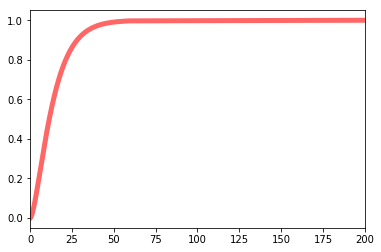

3.2492678986524486
11.438367230904122
28.117174362820386


In [42]:
m10 = np.median(datzz[::3])
m50 = np.median(datzz[1::3])
m90 = np.median(datzz[2::3])
paramsz = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                tr_solver='exact')
datzx = stat.gamma.rvs(paramsz.x[0], 0., scale=paramsz.x[1], size=1000)  
for i in range(1000):
    if datzx[i] > 5000.:
        datzx[i] = 5000.
datzx.sort()
datzx[-1] = 200.
datzy = stat.gamma.cdf(datzx,paramsz.x[0], 0., scale=paramsz.x[1])
plt.plot(datzx, stat.gamma.cdf(datzx, paramsz.x[0], 0., paramsz.x[1]),'r-', lw=5, alpha=0.6, label='gamma cdf')
plt.xlim(0,200)
plt.show()
print(stat.gamma.ppf(.1, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.5, paramsz.x[0], 0., paramsz.x[1]))
print(stat.gamma.ppf(.9, paramsz.x[0], 0., paramsz.x[1]))

In [43]:
outx = np.zeros((datzx.shape[0]))
outy = np.zeros((datzy.shape[0]))
outx = pd.DataFrame(datzx)
outy = pd.DataFrame(datzy)
outy.to_csv('no6y.csv')
outx.to_csv('no6x.csv')

## BOOTSTRAP

In [44]:
def ff(params,xdata,ydata):
    return xdata-params[1]*sp.gammaincinv(params[0],ydata)

In [45]:
def gbootstrap(xdata):
    bstrap = np.zeros(xdata.shape)
    for i in range(xdata.shape[0]):
        randidx = rand.randrange(xdata.shape[0])
        dat = xdata[randidx,:]
        bstrap[i,:] = dat
    return bstrap

In [46]:
def compute_ci(intrp, confidence = 0.95):
    avg = np.zeros((intrp.shape[1]),dtype = 'float32')
    lb   = np.zeros((intrp.shape[1]),dtype = 'float32')
    up   = np.zeros((intrp.shape[1]),dtype = 'float32')
    pz = (1.0-confidence)/2.0
    for i in range(intrp.shape[1]):
        vec = intrp[:,i]
        vec.sort()
        avg[i] = np.average(vec)
        lb[i] = vec[math.floor(pz*len(vec))]
        up[i] = vec[math.floor((1.0-pz)*len(vec))]
    return avg,lb,up

In [47]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 150
for i in range(nbstraps):
    bstrap = gbootstrap(xdata)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')    

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


In [48]:
print(np.array(xdata).shape)
print(np.array(bootstrapsy).shape)

(150, 3)
(10000, 1000)


In [49]:
intrp_ = np.array([x*(101/100)*2 for x in range(0,100)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.95)

In [50]:
ax = plt.gca()
clr = 'm'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) # , label = "ub")
plt.xlim(0,200)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.05)

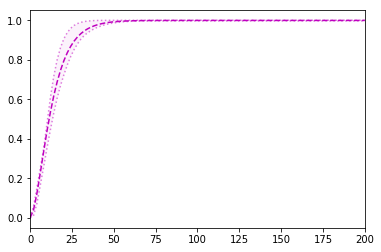

In [51]:
plt.show()

In [52]:
out = np.zeros((intrp_.shape[0],4))
for i in range(intrp_.shape[0]):
    out[i,0] = intrp_[i]
    out[i,1] = avg[i]
    out[i,2] = lb[i]
    out[i,3] = ub[i]
out = pd.DataFrame(out)
out.to_csv('no6.csv')

# Conference Bootstrap

In [53]:
xhlai = q6c[q6c.index <= 57]
xhlai = np.asarray(xhlai[['Q6a','Q6b','Q6c']])
xijcai = q6c[q6c.index > 57]
xijcai = np.asarray(xijcai[['Q6a','Q6b','Q6c']])

In [54]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xhlai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


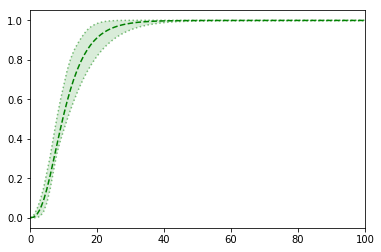

In [55]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg, lb, ub = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb, ub, facecolor=clr, alpha=0.15)
plt.show()
ihlai = copy.deepcopy(intrp_)

In [56]:
bootstrapsx = []
bootstrapsy = []
nbstraps = 10000
nrvars = 41
for i in range(nbstraps):
    bstrap = gbootstrap(xijcai)
    iparams = np.array([9.,1.])
    m10 = np.median(bstrap[:,0])
    m50 = np.median(bstrap[:,1])
    m90 = np.median(bstrap[:,2])
    paramsf = optimize.least_squares(ff, x0f, args=([m10,m50,m90], ydata),max_nfev=10000,
                                    tr_solver='exact')        
    datx = stat.gamma.rvs(paramsf.x[0], 0., scale=paramsf.x[1], size=1000)
    datx.sort()
    daty = stat.gamma.cdf(datx,paramsf.x[0], 0., scale=paramsf.x[1])
    bootstrapsx.append(datx)
    bootstrapsy.append(daty)
    if (i+1)%1000 == 0:
        print('Bootstrap '+str(i+1)+ ' of '+str(nbstraps)+'.')

Bootstrap 1000 of 10000.
Bootstrap 2000 of 10000.
Bootstrap 3000 of 10000.
Bootstrap 4000 of 10000.
Bootstrap 5000 of 10000.
Bootstrap 6000 of 10000.
Bootstrap 7000 of 10000.
Bootstrap 8000 of 10000.
Bootstrap 9000 of 10000.
Bootstrap 10000 of 10000.


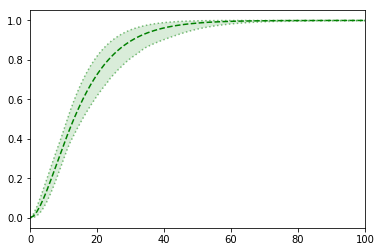

In [57]:
intrp_ = np.array([x*(201/200) for x in range(0,200)])
intrp = np.zeros((nbstraps,len(intrp_)), dtype = 'float32')
for i in range(nbstraps):
    intrp[i,:] = np.interp(intrp_, np.array(bootstrapsx[i]), np.array(bootstrapsy[i]))
avg9, lb9, ub9 = compute_ci(intrp, confidence = 0.90)
ax = plt.gca()
clr = 'green'
plt.plot(intrp_, avg9, color=clr, ls='--', label="Average Sensitivity")
plt.plot(intrp_, lb9, color=clr, ls=':', label="95% Confidence Intervals",alpha=0.5) # , label = "lb")
plt.plot(intrp_, ub9, color=clr, ls=':',alpha=0.5) 
plt.xlim(0,100)
ax.fill_between(intrp_, lb9, ub9, facecolor=clr, alpha=0.15)
plt.show()
iijcai = copy.deepcopy(intrp_)

In [58]:
plt.clf()
ax = plt.gca()
clr = 'darkcyan'
plt.plot(ihlai, avg, color=clr, ls='--', label="50% Narrow HLAI")
plt.plot(ihlai, lb, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(ihlai, ub, color=clr, ls=':',alpha=0.75) # , label = "ub")
ax.fill_between(ihlai, lb, ub, facecolor=clr, alpha=0.25)
clr = 'grey'
plt.plot(iijcai, avg9, color=clr, ls='--', label="50% Narrow IJCAI")
plt.plot(iijcai, lb9, color=clr, ls=':', label="95% Confidence Interval",alpha=0.5) # , label = "lb")
plt.plot(iijcai, ub9, color=clr, ls=':',alpha=0.65) # , label = "ub")
ax.fill_between(iijcai, lb9, ub9, facecolor=clr, alpha=0.25)

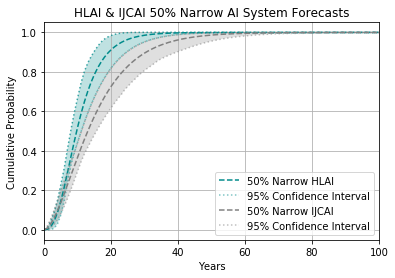

In [59]:
plt.xlabel('Years')
plt.ylabel('Cumulative Probability')
plt.title('HLAI & IJCAI 50% Narrow AI System Forecasts')
plt.legend(loc='lower right')
plt.grid()
plt.xlim(0,100)
plt.savefig('Q6-hlai-ijcai-cis.png')
plt.show()

In [82]:
np.median(xhlai[:,0])

5.0

In [67]:
np.median(xhlai[:,1])

10.0

In [81]:
np.median(xhlai[:,2])

20.0

In [77]:
np.median(xijcai[:,0])

5.0

In [69]:
np.median(xijcai[:,1])

12.0

In [78]:
np.median(xijcai[:,2])

30.0